In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,EfficientNetB4,Xception
import warnings
import glob

In [3]:
train = pd.read_csv("/content/drive/MyDrive/MyModel_Data/insat_3d_ds - Sheet.csv")
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=30,
                                   shear_range=0.25,
                                   zoom_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_data = train_datagen.flow_from_dataframe(train,directory="/content/drive/MyDrive/MyModel_Data/CYCLONE_DATASET_INFRARED",subset="training",
                                               x_col="img_name",y_col="label",target_size=(256, 256),batch_size=16,class_mode='raw')

Found 136 validated image filenames.


In [4]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)

model_MM=Model(inputs=inputs,outputs=outputs)

In [4]:
#plot_model(model_MM, to_file='/content/drive/MyDrive/MyModel_Data/Model_Plot/My_Model_plot.png', show_shapes=True, show_layer_names=True,rankdir="LR")

In [5]:
model_MM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
                       loss='mae',
                       metrics=[tf.keras.metrics.RootMeanSquaredError()])

save_best = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/MyModel_Data/MyModel_m/Model_MM_2.h5",
                                               monitor='loss',
                                               save_best_only=True,
                                               verbose=1)


In [32]:
history_MM=model_MM.fit(train_data, epochs=750,callbacks=[save_best])

Epoch 1/750
9/9 [==============================] - ETA: 0s - loss: 504.2251 - root_mean_squared_error: 51.5078
Epoch 1: loss improved from inf to 504.22507, saving model to /content/drive/MyDrive/MyModel_Data/MyModel_m/Model_MM_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 19s 2s/step - loss: 504.2251 - root_mean_squared_error: 51.5078
Epoch 2/750
9/9 [==============================] - ETA: 0s - loss: 418.0974 - root_mean_squared_error: 37.2174
Epoch 2: loss improved from 504.22507 to 418.09744, saving model to /content/drive/MyDrive/MyModel_Data/MyModel_m/Model_MM_2.h5
9/9 [==============================] - 7s 740ms/step - loss: 418.0974 - root_mean_squared_error: 37.2174
Epoch 3/750
9/9 [==============================] - ETA: 0s - loss: 328.4866 - root_mean_squared_error: 26.8134
Epoch 3: loss improved from 418.09744 to 328.48657, saving model to /content/drive/MyDrive/MyModel_Data/MyModel_m/Model_MM_2.h5
9/9 [==============================] - 7s 773ms/step - loss: 328.4866 - root_mean_squared_error: 26.8134
Epoch 4/750
9/9 [==============================] - ETA: 0s - loss: 254.7290 - root_mean_squared_error: 21.5539
Epoch 4: loss improved from 328.48657 to 254.72897, saving model to /content/drive/MyDrive/MyModel

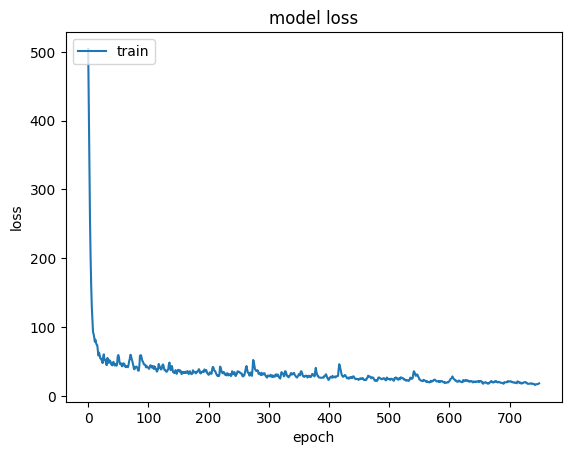

In [33]:
plt.plot(history_MM.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [6]:
model_MM_final = tf.keras.models.load_model('/content/drive/MyDrive/MyModel_Data/MyModel_m/Model_MM_2.h5')
history_MM_eval=model_MM_final.evaluate(train_data)

9/9 [==============================] - 321s 35s/step - loss: 23.2547 - root_mean_squared_error: 23.1712


In [7]:
pred_MM = model_MM_final.predict(train_data, verbose=1).round(2)

9/9 [==============================] - 322s 35s/step


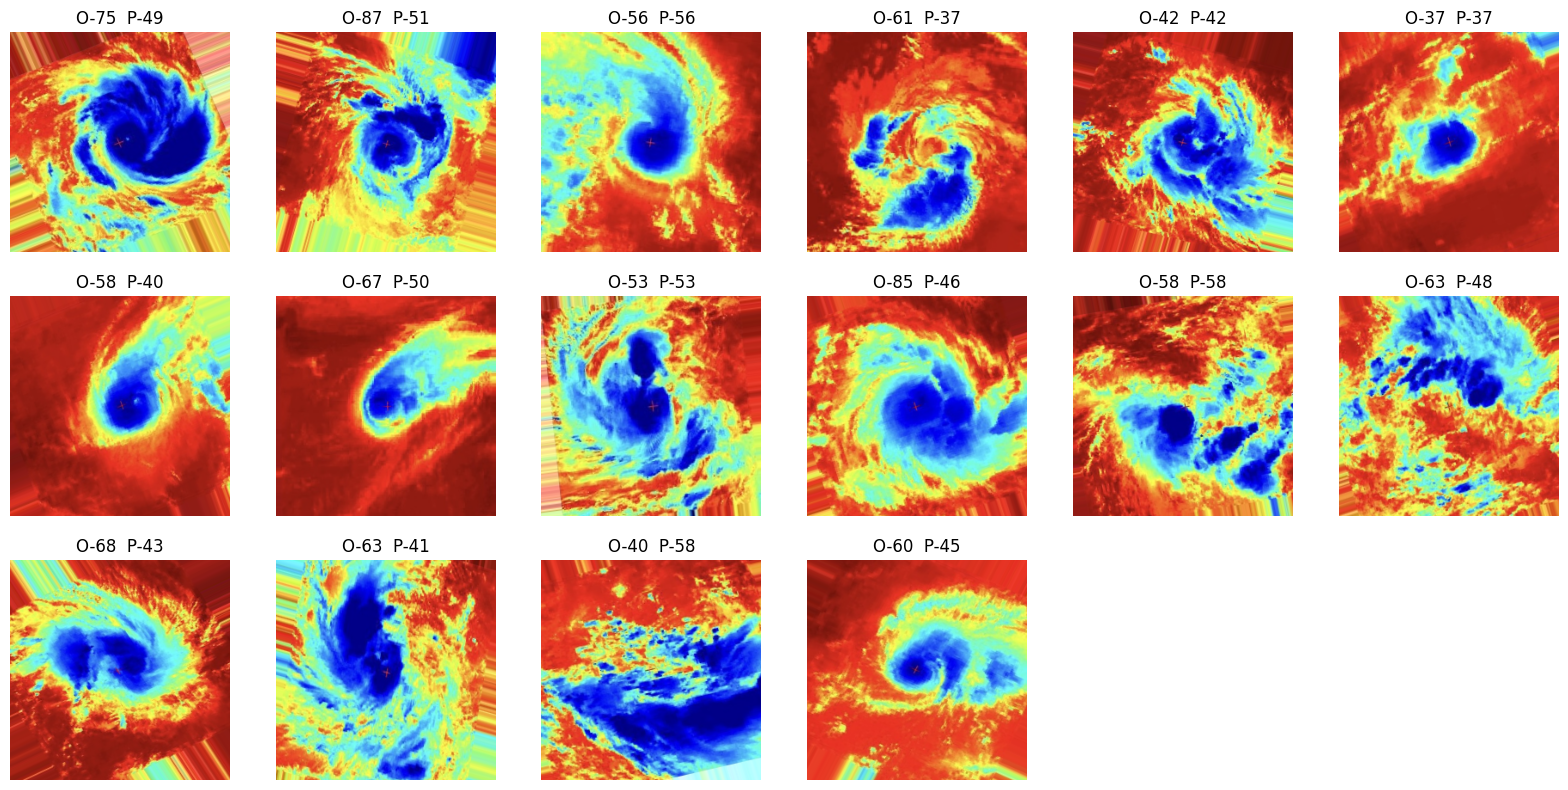

In [118]:
plt.figure(figsize=(20, 20))
for i in range(16):
    cur_img = train_data[0][0][i]
    ax = plt.subplot(6, 6, i + 1)
    plt.title("O-"+str(train_data[0][1][i])+"  P-"+str(int(pred_MM[i][0])), color="black")
    plt.imshow(cur_img)
    plt.axis("off")

Let's make a DataFrame with the Actual Labels and the predicted labels.

In [9]:
import math
ind=[]
for i in range(len(train_data)):
  for j in train_data[i][1]:
    ind.append(j)
for i in range(136):
  pred_MM[i]=np.int32(pred_MM[i][0])

In [120]:
pred=[]
for i in pred_MM:
  pred.append(int(i[0]))

In [133]:
dict={'Actual':ind,'Predicted':pred}
df=pd.DataFrame(dict)
print("Predicted : "+str(df.loc[df['Actual']==df['Predicted']].shape[0])+"/"+str(df.shape[0])+" Accurately")

Predicted : 63/136 Accurately


In [126]:
df.loc[df['Actual']==df['Predicted']]

,Actual,Predicted
2,56,56
4,42,42
5,37,37
8,53,53
10,58,58
...,...,...
123,43,43
127,44,44
130,35,35
133,52,52
